In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train= pd.read_csv('E:\Projects2021\Heart Disease\Project\Dataset/heart.csv')
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df_train.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [4]:
df_train.target.value_counts()

1    165
0    138
Name: target, dtype: int64

balanced

In [5]:
df_train.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [6]:
df_train.restecg.value_counts()
#We can consider removing group 2!

1    152
0    147
2      4
Name: restecg, dtype: int64

In [7]:
df_train.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [8]:
df_train.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [9]:
df_train.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
df_train.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Unbalance

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

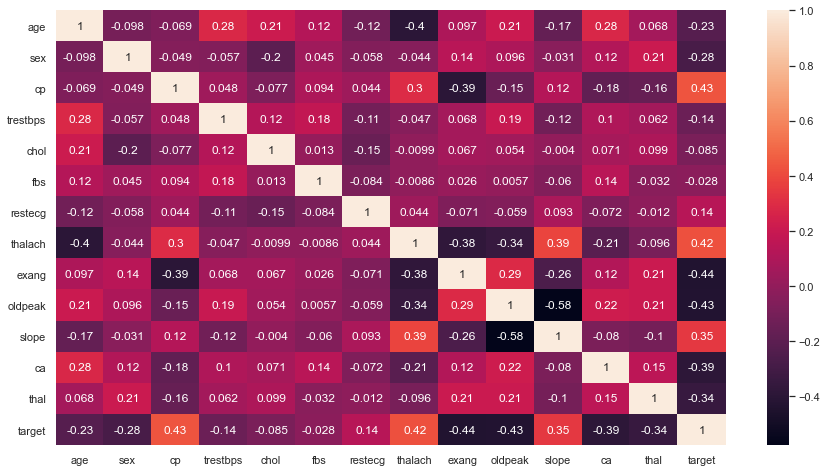

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_train.corr(),annot=True)

In [13]:
df_train.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


WEAK CORRELATION DATA + UNBALANCED

In [14]:
df_train.drop(columns=['sex'], inplace=True)

In [15]:
df_train

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,0,130,131,0,1,115,1,1.2,1,1,3,0


Outliers

In [16]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [17]:
print((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR)))

       age     cp  trestbps   chol    fbs  restecg  thalach  exang  oldpeak  \
0    False  False     False  False   True    False    False  False    False   
1    False  False     False  False  False    False    False  False    False   
2    False  False     False  False  False    False    False  False    False   
3    False  False     False  False  False    False    False  False    False   
4    False  False     False  False  False    False    False  False    False   
..     ...    ...       ...    ...    ...      ...      ...    ...      ...   
298  False  False     False  False  False    False    False  False    False   
299  False  False     False  False  False    False    False  False    False   
300  False  False     False  False   True    False    False  False    False   
301  False  False     False  False  False    False    False  False    False   
302  False  False     False  False  False    False    False  False    False   

     slope     ca   thal  target  
0    False  Fals

C:\Users\WARRIOR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

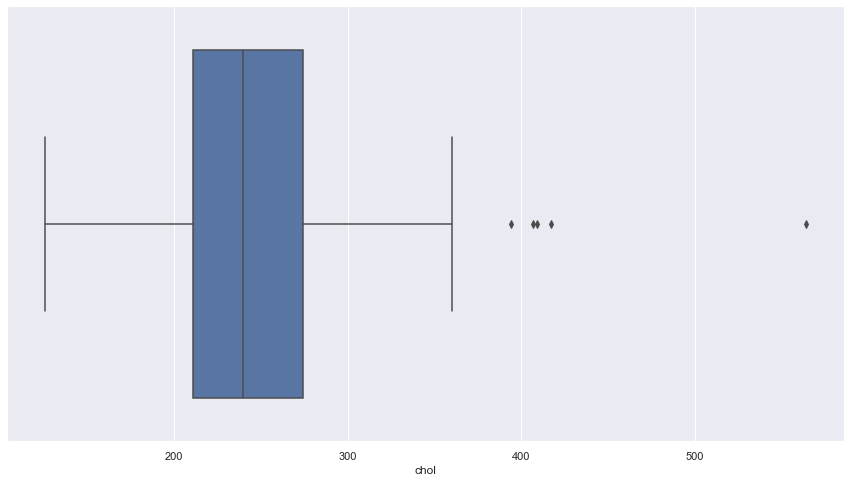

In [18]:
sns.boxplot(df_train.chol)
#Few outliers in column

In [19]:
from sklearn.model_selection import train_test_split
target_col = ['target']

cols = [i for i in df_train.columns if i not in target_col]

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(df_train[cols], df_train[target_col], 
                                                    test_size = .25, random_state = 111)


In [20]:
x_train

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
178,43,0,120,177,0,0,120,1,2.5,1,0,3
298,57,0,140,241,0,1,123,1,0.2,1,0,3
201,60,0,125,258,0,0,141,1,2.8,1,1,3
246,56,0,134,409,0,0,150,1,1.9,1,2,3
153,66,2,146,278,0,0,152,0,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
118,46,1,105,204,0,1,172,0,0.0,2,0,2
169,53,0,140,203,1,0,155,1,3.1,0,0,3
275,52,0,125,212,0,1,168,0,1.0,2,2,3
86,68,2,118,277,0,1,151,0,1.0,2,1,3


In [21]:
y_train

,target
178,0
298,0
201,0
246,0
153,1
...,...
118,1
169,0
275,0
86,1


In [22]:
#ANN
import tensorflow as tf


In [23]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
#Initialising ANN
ann = tf.keras.models.Sequential()
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
ann.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8/8 [==============================] - 0s 2ms/step - loss: 10.0643 - accuracy: 0.5198
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 5.5774 - accuracy: 0.5198
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.7759 - accuracy: 0.5198
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 2.9619 - accuracy: 0.5198
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 2.3724 - accuracy: 0.5198
Epoch 6/100
8/8 [=====

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
predic = ann.predict(x_test)
predic=(predic>0.5)
print("\nClassification report:\n", classification_report(y_test, predic))


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.62      1.00      0.76        47

    accuracy                           0.62        76
   macro avg       0.31      0.50      0.38        76
weighted avg       0.38      0.62      0.47        76



C:\Users\WARRIOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WARRIOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WARRIOR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
model=RFC.fit(x_train,y_train)

<ipython-input-22-09f581a26425>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=RFC.fit(x_train,y_train)


In [ ]:

from sklearn.metrics import confusion_matrix,classification_report
predictions = model.predict(x_test)

print("\nClassification report:\n", classification_report(y_test, predictions))


Classification report:
               precision    recall  f1-score   support

           0       0.86      0.62      0.72        29
           1       0.80      0.94      0.86        47

    accuracy                           0.82        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.82      0.82      0.81        76



In [ ]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))

In [ ]:
import json
import os
from werkzeug.utils import secure_filename
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from flask import Flask, render_template, session, request, flash, redirect
import flask
import cv2
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import StandardScaler
import sklearn.externals
import joblib
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib

import numpy as np



def model_predict(age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal, model):
    x_train=[age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
    x_train=np.array(x_train)
    x_train=np.reshape(x_train,(-1,12))
    df=pd.DataFrame(x_train,columns=['age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] )
    # df=preprocess(df)
    preds = model.predict(df)
    #preds = np.argmax(preds, axis=1)
   
   

   
    if preds[0] == 0:
        pred = "No churn"
    else :
        pred = "Churn"
   

    return pred





In [ ]:
predict=model_predict(57,0,140,241,0,1,123,1,0.2,1,0,3,model)

In [ ]:
predict

'No churn'